In [1]:
import pandas as pd                                           # For structured data operations (DataFrames, CSVs, etc.)
import numpy as np                                            # For numerical computations and array handling
import matplotlib.pyplot as plt                               # For basic plotting and visualizations
import seaborn as sns                                         # For advanced statistical visualizations
from imblearn.over_sampling import SMOTE                      # Synthetic Minority Over-sampling Technique to balance target classes
from sklearn.preprocessing import MinMaxScaler                # Scales features to a fixed range (typically 0–1)
from sklearn.model_selection import train_test_split          # Splits data into training and testing sets
from sklearn.linear_model import LogisticRegression          # Logistic regression model for binary classification
from sklearn.metrics import classification_report             # Generates precision, recall, F1-score, and support
from sklearn.metrics import confusion_matrix                  # Displays true vs predicted classifications

In [2]:
loan_data = pd.read_csv("loan_approval_dataset.csv")   # Importing csv file
loan_data                                             

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
loan_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
print(loan_data.columns.tolist())

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


# Univariate Analysis

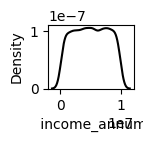

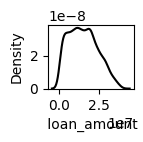

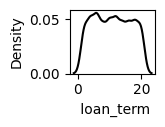

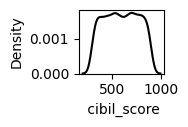

In [5]:
Num = [" income_annum"," loan_amount"," loan_term"," cibil_score"]  #list of numerical features to visualize

for i in range(0,len(Num)):                                               # 
    plt.subplot(5,5,i+1)
    sns.kdeplot(x = loan_data[Num[i]], color = "black")  # Kernel Density Estimate for the selected feature
    plt.show()
    

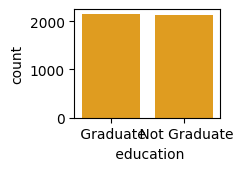

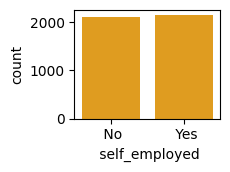

In [6]:
Cat = [" education"," self_employed"]

for i in range(0,len(Cat)):
    plt.subplot(3,3,i+1)
    sns.countplot(x = loan_data[Cat[i]],data = loan_data,color ="orange")  # Plot count of each category using Seaborn's countplot
    plt.show()

<Axes: xlabel=' income_annum', ylabel='Count'>

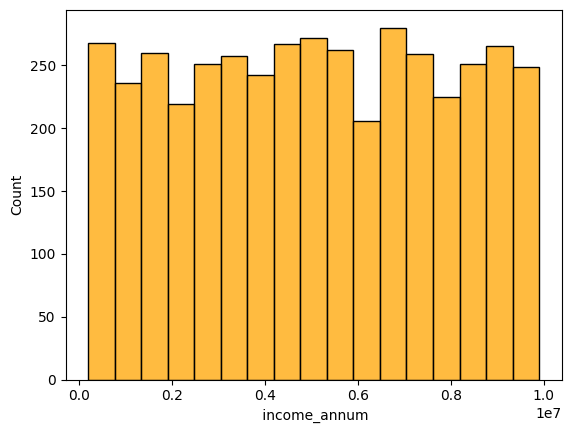

In [7]:
sns.histplot(data = loan_data , x = " income_annum",color = "orange")

# Bi variate-analysis

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

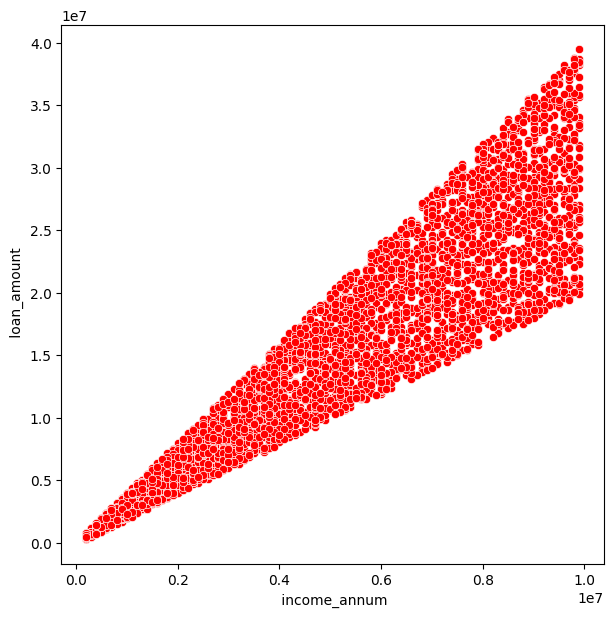

In [8]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = loan_data,x = " income_annum", y = " loan_amount",color = "r") # relationship between annual income and loan amount


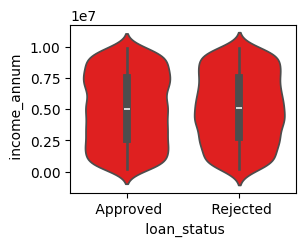

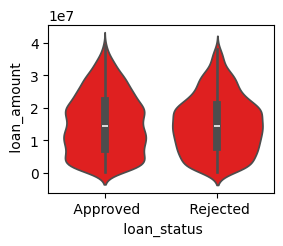

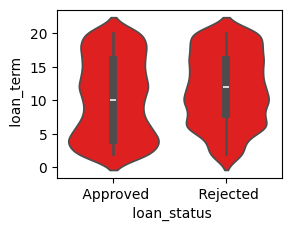

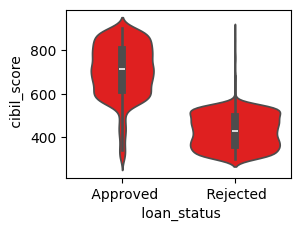

In [9]:
Num = [" income_annum"," loan_amount"," loan_term"," cibil_score"]

for i in range(0,len(Num)): 
    plt.subplot(2,2,i+1)                                         # Violin plot shows distribution shape, central tendency, and spread
    sns.violinplot(x = " loan_status",y = loan_data[Num[i]],data = loan_data , color = "r") 
    plt.show()

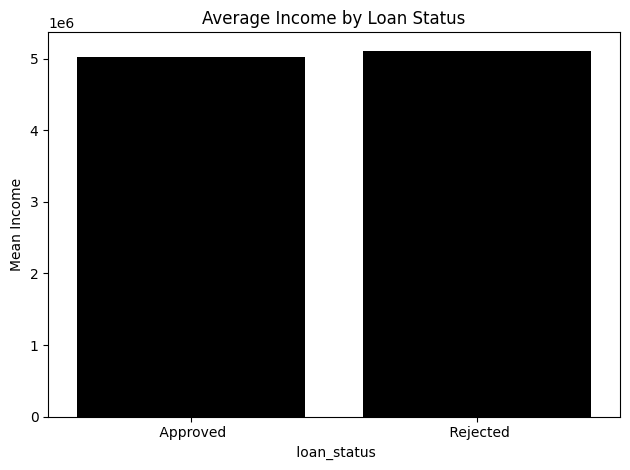

In [10]:

avg_income = loan_data.groupby(" loan_status")[" income_annum"].mean().reset_index()  # group the data as per loan status

sns.barplot(x=" loan_status", y=" income_annum", data=avg_income, color="black")    # visualising with the help of barplot
plt.title("Average Income by Loan Status") 
plt.ylabel("Mean Income")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: >

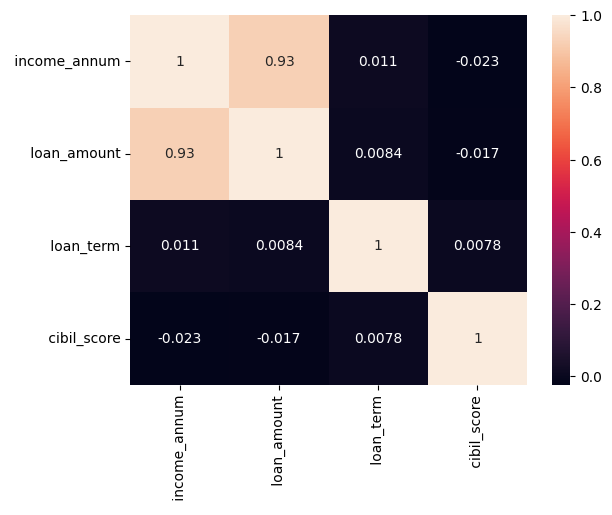

In [11]:
sns.heatmap(loan_data[Num].corr(),annot = True)  # Generate a correlation matrix for the numeric columns in the loan_data DataFrame


In [12]:
data = loan_data.copy()

In [13]:
data[' income_log'] = np.log1p(data[' income_annum'])  # log transformation to reduce skewness and normalize income distribution

In [14]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_log
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,16.077274
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,15.226498
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,16.023785
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,15.919645
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,16.097893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,13.815512
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,15.009433
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,15.687313
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,15.226498


In [15]:
data['loan_amount_log'] = np.log1p(data[' loan_amount'])
data['residential_log'] = np.log1p(data[' residential_assets_value'])
data['commercial_log'] = np.log1p(data[' commercial_assets_value'])
data['luxury_log'] = np.log1p(data[' luxury_assets_value'])
data['bank_log'] = np.log1p(data[' bank_asset_value'])

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_log,loan_amount_log,residential_log,commercial_log,luxury_log,bank_log
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,16.077274,17.213369,14.690980,16.683410,16.937876,15.894952
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,15.226498,16.316947,14.808763,14.603968,15.990262,15.009433
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,16.023785,17.206658,15.775605,15.319588,17.321068,16.364956
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,15.919645,17.239773,16.716932,15.009433,16.963964,15.882373
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,16.097893,17.001863,16.333207,15.919645,17.196505,15.424949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,13.815512,14.648420,14.845130,13.122365,15.009433,13.592368
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,15.009433,16.240313,15.250595,14.880222,16.213406,14.457365
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,15.687313,16.989389,13.997833,16.333207,16.711423,15.803385
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,15.226498,16.364956,15.919645,13.458837,16.461685,15.573369


In [17]:
data.columns.to_list()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status',
 ' income_log',
 'loan_amount_log',
 'residential_log',
 'commercial_log',
 'luxury_log',
 'bank_log']

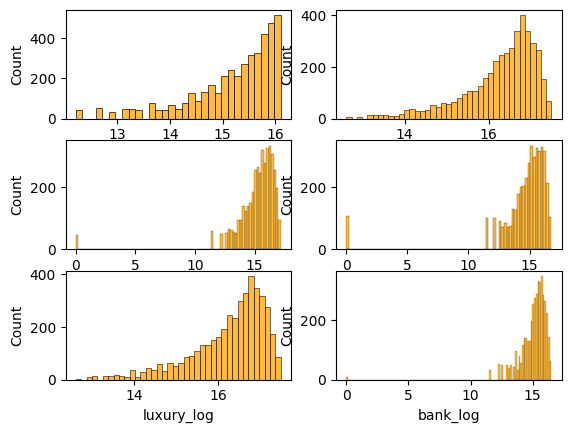

In [18]:
Log_Num = [' income_log','loan_amount_log','residential_log','commercial_log','luxury_log','bank_log']

for i in range(0,len(Log_Num)):
    plt.subplot(3,2,i+1)
    sns.histplot(data = data,x = data[Log_Num[i]],color = "orange")
    

In [19]:
data = pd.get_dummies(data , dtype = int)

In [20]:
data

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,...,residential_log,commercial_log,luxury_log,bank_log,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,...,14.690980,16.683410,16.937876,15.894952,1,0,1,0,1,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,...,14.808763,14.603968,15.990262,15.009433,0,1,0,1,0,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,...,15.775605,15.319588,17.321068,16.364956,1,0,1,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,...,16.716932,15.009433,16.963964,15.882373,1,0,1,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,...,16.333207,15.919645,17.196505,15.424949,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,...,14.845130,13.122365,15.009433,13.592368,1,0,0,1,0,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,...,15.250595,14.880222,16.213406,14.457365,0,1,0,1,1,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,...,13.997833,16.333207,16.711423,15.803385,0,1,1,0,0,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,...,15.919645,13.458837,16.461685,15.573369,0,1,1,0,1,0


In [21]:
data.drop(" loan_status_ Rejected",axis = 1,inplace = True)

In [22]:
data = data.rename(columns = {" loan_status_ Approved":"Loan_status"})

In [23]:
data = data.drop([" loan_amount"],axis =1)   # removing unwanted columns 

In [24]:
data = data.drop([" residential_assets_value"],axis =1)

In [25]:
data = data.drop([" commercial_assets_value"],axis =1)

In [26]:
data = data.drop([" luxury_assets_value"],axis =1)

In [27]:
data = data.drop([" bank_asset_value"],axis =1)

In [28]:
data = data.drop([" income_annum"],axis =1)

In [29]:
data.drop(" self_employed_ No",axis = 1,inplace = True)
data = data.rename(columns = {" self_employed_ Yes":"Employement_status"})

In [30]:
data.drop(" education_ Not Graduate",axis = 1,inplace = True)
data = data.rename(columns = {" education_ Graduate":"Graduate"})

In [31]:
data.isnull().sum()

loan_id                0
 no_of_dependents      0
 loan_term             0
 cibil_score           0
 income_log            0
loan_amount_log        0
residential_log       28
commercial_log         0
luxury_log             0
bank_log               0
Graduate               0
Employement_status     0
Loan_status            0
dtype: int64

In [32]:
data["residential_log"] = data["residential_log"].fillna(data["residential_log"].mean())

In [33]:
data.isnull().sum()

loan_id               0
 no_of_dependents     0
 loan_term            0
 cibil_score          0
 income_log           0
loan_amount_log       0
residential_log       0
commercial_log        0
luxury_log            0
bank_log              0
Graduate              0
Employement_status    0
Loan_status           0
dtype: int64

In [34]:
x = data.drop(["Loan_status"],axis = 1)
y = data["Loan_status"]                    # X ,and y dataset for test and train 

In [35]:
x

,loan_id,no_of_dependents,loan_term,cibil_score,income_log,loan_amount_log,residential_log,commercial_log,luxury_log,bank_log,Graduate,Employement_status
0,1,2,12,778,16.077274,17.213369,14.690980,16.683410,16.937876,15.894952,1,0
1,2,0,8,417,15.226498,16.316947,14.808763,14.603968,15.990262,15.009433,0,1
2,3,3,20,506,16.023785,17.206658,15.775605,15.319588,17.321068,16.364956,1,0
3,4,3,8,467,15.919645,17.239773,16.716932,15.009433,16.963964,15.882373,1,0
4,5,5,20,382,16.097893,17.001863,16.333207,15.919645,17.196505,15.424949,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,12,317,13.815512,14.648420,14.845130,13.122365,15.009433,13.592368,1,1
4265,4266,0,20,559,15.009433,16.240313,15.250595,14.880222,16.213406,14.457365,0,1
4266,4267,2,18,457,15.687313,16.989389,13.997833,16.333207,16.711423,15.803385,0,0
4267,4268,1,8,780,15.226498,16.364956,15.919645,13.458837,16.461685,15.573369,0,0


In [36]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: Loan_status, Length: 4269, dtype: int64

In [37]:
x,y = SMOTE().fit_resample(x,y)           # Apply SMOTE to balance class distribution by generating synthetic minority samples

In [38]:
x = MinMaxScaler().fit_transform(x)    # Normalize feature values to range [0, 1] for consistent model input

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) # Split data into training and testing sets for model validation

In [40]:
classifier = LogisticRegression(solver = "saga",max_iter = 500 , random_state = 1)
classifier.fit(x_train, y_train)   # Train the model on the training data


y_pred = classifier.predict(x_test)  #  Predict outcomes on the test set

print(classification_report(y_test,y_pred))  #  Evaluate model performance with precision, recall, F1-score, and support

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       522
           1       0.94      0.91      0.93       541

    accuracy                           0.93      1063
   macro avg       0.93      0.93      0.93      1063
weighted avg       0.93      0.93      0.93      1063

